# **Business Intelligence: Financial Sector Analysis**

In this project, I will first conduct an Exploratory Data Analysis (EDA) of a financial dataset. Following this, as a second stage of the project, I will build a Power BI dashboard based on the business problems identified as requirements for this project. To achieve this, I will follow this **pipeline**:

1. **Define the Business Problem;**
2. **Data Collection;**
3. **Cleaning and Preprocessing of Data;**
4. **Exploratory Data Analysis (EDA);**
5. **Visualization and Reporting.**

In this notebook, I will only perform steps 1 through 4. The part related to visualization and reporting will be carried out in Power BI, as mentioned earlier.

## **1. Business Problem**
The objectives of the analysis are as follows:

- Evaluate **financial flows to identify patterns in payments and receipts**, and assess the **company's stability**.
- Identify **geographical patterns in the distribution of customers and suppliers**, and how this impacts the **transaction volume**.
- Check for **delays in payments and their impacts on cash flow**.
- Examine which **banks concentrate the most payments and receipts**, and whether there are **differences in financial behavior** among them.

There is no specific **business problem** to be solved. The analysis consists of processing and interpreting the existing data within the requested scope. This task may eventually reveal potential business problems.

#### ***What are the benefits?***

- **Anticipation of financial issues:** Predicting periods of lower liquidity and taking corrective actions.

- **Identification of seasonality:** If there are cyclical patterns, the company can adjust inventory, promotions, and resource acquisition strategies.

- **Logistics optimization:** Knowing where the main customers and suppliers are located can reduce transportation costs and improve delivery times.

- **Strategic expansion:** Facilitates the selection of new markets for expansion based on high-demand regions.

- **Reduction of defaults:** Identifying recurring customers with delays allows the creation of specific policies, such as discounts for early payment.

- **Improvement of negotiations:** With concrete data, the company can renegotiate terms and conditions with customers and suppliers.

- **Reduction of banking costs:** If a bank concentrates many receipts, it may be advantageous to negotiate special fees and rates.

- **Transaction optimization:** The company can reorganize accounts to avoid unnecessary costs with transfers between different banks.

### **Importing the libraries**

In [1]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os

# Split the data.
#from sklearn.model_selection import train_test_split
from IPython.display import display

# Utilis
import sys
sys.path.append(os.path.abspath('..')) # Adiciona o diretório raiz ao sys.path
from src.eda_utilis import *

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 11
#sns.set_context("paper", font_scale=1.2)  

# Palette Setting
color_palette = [
    '#023050', '#0080b6', '#0095c7', '#90a4ae', '#6a3d9a', '#8f4f4f', '#e31a1c',
    '#e85d10', '#ff8210', '#ff9c35'
]
sns.set_palette(sns.color_palette(color_palette))

# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.3137254901960784),
 (0.0, 0.5019607843137255, 0.7137254901960784),
 (0.0, 0.5843137254901961, 0.7803921568627451),
 (0.5647058823529412, 0.6431372549019608, 0.6823529411764706),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.5607843137254902, 0.30980392156862746, 0.30980392156862746),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9098039215686274, 0.36470588235294116, 0.06274509803921569),
 (1.0, 0.5098039215686274, 0.06274509803921569),
 (1.0, 0.611764705882353, 0.20784313725490197)]

## **2. Understanding the date**

- The dataset was collected from:  
  [https://drive.google.com/drive/folders/1EGWhdB3owuvRRlHsTV0tUPBzfDemGdOV](https://drive.google.com/drive/folders/1EGWhdB3owuvRRlHsTV0tUPBzfDemGdOV).

- It is an Excel spreadsheet with multiple sheets, and the data is in Brazilian Portuguese.

In [2]:
# Checking the file path
file_path = os.path.abspath('../BaseFinanceiro/Financeiro.xlsx') 

# Loading the dataset
dataset = load_data(file_path)

Excel file loaded successfully. Sheets found: ['Cliente', 'Fornecedor', 'Banco', 'Pagamentos', 'Recebimentos']


In [3]:
# Reading the first few lines of spreadsheets
for sheet_name, df in dataset["data"].items():
    print(f"\nSheet {sheet_name}") 
    display(df.head(10)) 
    print("-"*100)


Sheet Cliente


,Id Cliente,Razao Social,Nome Fantasia,Tipo Pessoa,Municipio,UF
0,1,00_VPCOM,VENTOS POTIGUARES COMERCIALIZADORA...,Pessoa Física,SAO PAULO,SÃO PAULO
1,2,1001 INDUSTRIA,1001 INDUSTRIA DE ARTEFATOS...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
2,3,2 ALIANCAS,2 ALIANCAS ARMAZENS GERAIS...,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
3,4,2WENERGIA,2W ENERGIA S.A.,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
4,5,3 CORACOES AL,TRES CORACOES ALIMENTOS S.A.,Pessoa Física,SAO PAULO,SÃO PAULO
5,6,3G ENERGIA,3G - TERCEIRA GERACAO COMERCIALIZADORA...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
6,7,3M,3M DO BRASIL LTDA,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
7,8,3M MANAUS,3M MANAUS INDUSTRIA DE PRODUTOS...,Pessoa Física,SAO PAULO,SÃO PAULO
8,9,3PL LOGISTICA,3PL BRASIL LOGISTICA S.A.,Pessoa Física,VITÓRIA,ESPÍRITO SANTO
9,10,3RIOS,3RIOS FIBRAS E RESINAS LTDA,Pessoa Física,SAO PAULO,SÃO PAULO


----------------------------------------------------------------------------------------------------

Sheet Fornecedor


,Id Fornecedor,Razao Social,Nome Fantasia,Tipo Pessoa,Municipio,UF
0,1,AGROBOI,AGRO BOI IMPORTACAO E EXPORTACAO...,Pessoa Jurídica,RIO DE JANEIRO,RIO DE JANEIRO
1,2,AGROENERGIA,AGROENERGIA COMERCIALIZADORA...,Pessoa Jurídica,RIO DE JANEIRO,RIO DE JANEIRO
2,3,AGROGEN DESENVOLVIMENTO,AGROGEN DESENVOLVIMENTO GENETICO...,Pessoa Física,BELO HORIZONTE,MINAS GERAIS
3,4,AGROINDUSTRIAL,AGROINDUSTRIAL SAO FRANCISCO...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
4,5,AGROLEITE,AGROLEITE CABINAS AGRICOLAS...,Pessoa Física,SÃO PAULO,SÃO PAULO
5,6,AGROMAGGI,AGROPECUARIA MAGGI LTDA,Pessoa Física,SÃO PAULO,SÃO PAULO
6,7,AGROMANTOVA,AGROMANTOVA LTDA,Pessoa Física,SÃO PAULO,SÃO PAULO
7,8,AGROMIX,AGROMIX-INDUSTRIA E COMERCIO...,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
8,9,AGROPALMA,INDUSTRIAS XHARA LTDA,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO
9,10,AGROPARR,AGROPARR ALIMENTOS LTDA,Pessoa Física,RIO DE JANEIRO,RIO DE JANEIRO


----------------------------------------------------------------------------------------------------

Sheet Banco


,Id Banco,Id Conta Bancária,Nome Banco,Município,UF
0,1,x 14057272557-06,BANCO DO BRASIL - SAO PAULO,SAO PAULO,SÃO PAULO
1,2,x 22208151256-06,ITAÚ - SAO PAULO,SAO PAULO,SÃO PAULO
2,3,x 41541621975-04,BRADESCO - SAO PAULO,SAO PAULO,SÃO PAULO
3,4,x 64252401479-03,SANTANDER - SAO PAULO,SAO PAULO,SÃO PAULO
4,5,x 77167377617-02,HSBC - SAO PAULO,SAO PAULO,SÃO PAULO
5,6,x 10859524552-06,BANCO SAFRA - SAO PAULO,SAO PAULO,SÃO PAULO
6,7,x 26759470396-10,BANCO DO BRASIL - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
7,8,x 25497925389-08,ITAÚ - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
8,9,x 61320183682-00,BRADESCO - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO
9,10,x 63718177635-06,SANTANDER - RIO DE JANEIRO,RIO DE JANEIRO,RIO DE JANEIRO


----------------------------------------------------------------------------------------------------

Sheet Pagamentos


,Id Fornecedor,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,9,x 80771218846-00,2018-01-11,2018-01-16,2018-01-11,19540.710
1,150,x 75664985359-06,2018-01-13,2018-01-16,2018-01-18,1577.625
2,150,x 61586581630-06,2018-01-13,2018-01-16,2018-01-19,1431.080
3,150,x 10641176832-10,2018-01-19,2018-01-23,2018-01-19,2060.765
4,197,x 77167377617-02,2018-01-30,2018-01-30,2018-01-30,13182.400
5,33,x 41541621975-04,2018-02-06,2018-02-06,2018-02-06,13088.810
6,89,x 77167377617-02,2018-02-06,2018-02-06,2018-02-06,23009.735
7,112,x 25497925389-08,2018-02-03,2018-02-06,2018-02-06,458.080
8,227,x 64252401479-03,2018-02-06,2018-02-06,2018-02-06,12986.645
9,405,x 10641176832-10,2018-02-06,2018-02-06,2018-02-06,11705.295


----------------------------------------------------------------------------------------------------

Sheet Recebimentos


,Id Cliente,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação
0,53,x 10859524552-06,2018-01-02,2018-01-02,2018-01-02,675.87
1,178,x 39315597929-00,2018-01-04,2018-01-04,2018-01-04,153538.56
2,178,x 41541621975-04,2018-01-05,2018-01-05,2018-01-05,29823.06
3,178,x 63718177635-06,2018-01-06,2018-01-06,2018-01-06,52492.86
4,178,x 80771218846-00,2018-01-06,2018-01-06,2018-01-06,29336.04
5,178,x 94994947160-08,2018-01-09,2018-01-09,2018-01-09,72147.34
6,783,x 14057272557-06,2018-01-09,2018-01-09,2018-01-09,5576.00
7,178,x 10859524552-06,2018-01-11,2018-01-11,2018-01-11,42301.72
8,178,x 22208151256-06,2018-01-12,2018-01-12,2018-01-12,1519.71
9,178,x 64252401479-03,2018-01-12,2018-01-12,2018-01-12,173417.00


----------------------------------------------------------------------------------------------------


#### ***Dataset Translation Terms***  
I will provide **the translation of table and column names into English** to assist in the analysis.  

- **Tables names:** *Customer* (Cliente), *Supplier* (Fornecedor), *Bank* (Banco), *Payments* (Pagamentos), and *Receipts* (Recebimentos).  

- **Columns names:** *Customer* (Cliente), *Bank Account* (Conta bancária), *Legal Name* (Razão Social), *Business Name* (Nome Fantasia), *Person Type* (Tipo Pessoa), *City* (Município), *State* (UF), *Date* (Data), *Issue* (Emissão), *Transaction* (Movimentação), *Payment* (Pagamento), *Transaction Amount* (Valor da Movimentação).  

#### ***Data Dictionary***  

1. **Customer and Supplier IDs:** Unique identifiers for customers and suppliers in the dataset. They can be represented as integers or strings, depending on the system, and examples include **12345** or **CUST67890**.  

2. **Bank Account ID:** Unique identifier for the bank account associated with a customer or supplier. It is typically stored as an integer or string, such as **ACC98765**. 

3. **Legal Name:** The official registered name of the customer or supplier. It is stored as a string, for example, **ABC Comércio Ltda**.  

4. **Business Name:** The trade name or "doing business as" name of the customer or supplier. It is stored as a string, such as **ABC Store**.  

5. **Person Type:** Indicates whether the entity is a natural person (individual) or a legal entity (company). It is stored as a string, with values like física for natural persons or Jurídica for legal entities.  

6. **City:** The city where the customer or supplier is located. It is stored as a string, for example, **São Paulo**.  

7. **State:** The state or federal unit where the customer or supplier is located. It is stored as a 2-character abbreviation, such as **SP**.  

8. **Date:** Dates related to the issuance of documents, transactions, and payments. It is stored as a date, for example, **2023-10-15**.  

9. **Transaction Amount:** The monetary value associated with a transaction (e.g., payment or receipt). It is stored as a decimal or float, such as **1500.75**. 

Now, I will check **the information in the tables**.

In [4]:
# Collecting info from spreadsheets
for sheet_name, df in dataset["data"].items():
    print("-" * 50) 
    print(f"◇ {sheet_name} ◇")
    print("-" * 50) 
    df.info()  

--------------------------------------------------
◇ Cliente ◇
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id Cliente     812 non-null    int64 
 1   Razao Social   812 non-null    object
 2   Nome Fantasia  812 non-null    object
 3   Tipo Pessoa    812 non-null    object
 4   Municipio      812 non-null    object
 5   UF             812 non-null    object
dtypes: int64(1), object(5)
memory usage: 38.2+ KB
--------------------------------------------------
◇ Fornecedor ◇
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id Fornecedor  630 non-null    int64 
 1   Razao Social   630 non-null    o

As you can see, there are no null values ​​in the spreadsheets. For convenience, I will highlight this information in a table. 

In [5]:
df_info = pd.DataFrame([
    {
        "Aba": sheet_name,
        "Linhas": df.shape[0],
        "Colunas": df.shape[1],
        "Colunas_Nulas": df.isnull().sum().sum()
    }
    for sheet_name, df in dataset["data"].items()
])

display(df_info)

,Aba,Linhas,Colunas,Colunas_Nulas
0,Cliente,812,6,0
1,Fornecedor,630,6,0
2,Banco,24,5,0
3,Pagamentos,1004,6,0
4,Recebimentos,1721,6,0


Let's see some **descriptive statistics**. 

In [6]:
for sheet_name, df in dataset["data"].items():
    print("-" * 50) 
    print(f"\n ◇ {sheet_name} Description ◇")
    display(df.describe().T)

--------------------------------------------------

 ◇ Cliente Description ◇


,count,mean,std,min,25%,50%,75%,max
Id Cliente,812.0,406.5,234.548502,1.0,203.75,406.5,609.25,812.0


--------------------------------------------------

 ◇ Fornecedor Description ◇


,count,mean,std,min,25%,50%,75%,max
Id Fornecedor,630.0,315.5,182.009615,1.0,158.25,315.5,472.75,630.0


--------------------------------------------------

 ◇ Banco Description ◇


,count,mean,std,min,25%,50%,75%,max
Id Banco,24.0,12.5,7.071068,1.0,6.75,12.5,18.25,24.0


--------------------------------------------------

 ◇ Pagamentos Description ◇


,count,mean,min,25%,50%,75%,max,std
Id Fornecedor,1004.0,408.761952,4.0,254.0,459.0,570.0,630.0,180.340196
Data de Emissao,1004,2019-04-20 06:01:26.055776768,2018-01-05 00:00:00,2018-12-11 18:00:00,2019-06-19 00:00:00,2019-09-17 00:00:00,2019-12-28 00:00:00,NaN
Data de Vencimento,1004,2019-05-03 11:05:29.880478208,2018-01-16 00:00:00,2018-12-26 00:00:00,2019-06-28 12:00:00,2019-09-28 00:00:00,2019-12-28 00:00:00,NaN
Data da Movimentação,1004,2019-05-05 09:36:34.422310656,2018-01-11 00:00:00,2018-12-25 00:00:00,2019-06-29 00:00:00,2019-10-01 00:00:00,2019-12-28 00:00:00,NaN
Valor da Movimentação,1004.0,23920.625015,0.0,2045.19,7068.6,17063.57625,1087492.49,77687.58015


--------------------------------------------------

 ◇ Recebimentos Description ◇


,count,mean,min,25%,50%,75%,max,std
Id Cliente,1721.0,324.345729,46.0,165.0,246.0,424.0,792.0,243.399107
Data de Emissao,1721,2018-12-03 22:07:02.545031936,2018-01-02 00:00:00,2018-06-09 00:00:00,2018-11-30 00:00:00,2019-06-08 00:00:00,2019-12-28 00:00:00,NaN
Data de Vencimento,1721,2019-01-06 09:52:23.986054656,2018-01-02 00:00:00,2018-07-13 00:00:00,2019-01-03 00:00:00,2019-07-09 00:00:00,2019-12-28 00:00:00,NaN
Data da Movimentação,1721,2019-01-08 13:41:39.709471488,2018-01-02 00:00:00,2018-07-14 00:00:00,2019-01-04 00:00:00,2019-07-11 00:00:00,2019-12-28 00:00:00,NaN
Valor da Movimentação,1721.0,34499.364443,0.0,4879.0,10962.27,25889.23,256906.12,51813.348938


In [7]:
# Making rows and columns of tables explicit
for sheet_name, df in dataset["data"].items():
    print(f"\n The table {sheet_name} has {df.shape[0]} rows and {df.shape[1]} columns.")    


 The table Cliente has 812 rows and 6 columns.

 The table Fornecedor has 630 rows and 6 columns.

 The table Banco has 24 rows and 5 columns.

 The table Pagamentos has 1004 rows and 6 columns.

 The table Recebimentos has 1721 rows and 6 columns.


Some insights:

 **1. Customer ID Distribution:**

- The range of customer IDs (from **46.0** to **792.0**) suggests a diverse customer base, but the median (**246.0**) being significantly lower than the mean (**324.35**) indicates that most customers are concentrated in the lower range. This may suggest that older customers (with lower IDs) are more active or that new customers (with higher IDs) are less frequent or have lower transaction volumes.

 **2. Temporal Patterns in Transactions:**

- The average issue date (**03/12/2018**) and due date (**06/01/2019**) show that the average period between issue and due date is approximately one month. This may indicate a standard 30-day payment cycle, common in many business operations.

- The average transaction date (**08/01/2019**) occurs two days after the average due date, suggesting that most payments are made shortly after the due date, possibly indicating punctual or slightly delayed payment behavior.

 **3. Transaction Values:**

- The large difference between the mean (**34.499,36**) and median (**10.962,27**) of transaction values indicates an asymmetric distribution, with some extremely high values pulling the mean upwards. This may suggest the presence of high-value transactions that are atypical compared to the majority.

- The maximum value of **256.906,12** is significantly higher than the third quartile value (**25.889,23**), indicating the presence of outliers that may represent special transactions or large clients.

 **4. Consistency and Variability:**

- The high standard deviation (**51.813,35**) in transaction values reinforces the idea of significant variability in transactions. This may indicate different customer profiles, ranging from small businesses to large corporations, or different types of transactions (e.g., one-time payments versus recurring payments).

- The consistency in issue, due, and transaction dates suggests a well-established and predictable process for managing receipts, which may be indicative of good financial management practices.

In what follows, I will check if there are **duplicate values** in any column of the spreadsheets.

In [8]:
for sheet_name, df in dataset["data"].items():
    print(f"\n📄 Spreadsheet: {sheet_name}") 
    
    for column in df.columns:
        duplicates = df[column].duplicated().sum()  
        print(f"  ◇ Column '{column}': {duplicates} duplicated values")


📄 Spreadsheet: Cliente
  ◇ Column 'Id Cliente': 0 duplicated values
  ◇ Column 'Razao Social': 0 duplicated values
  ◇ Column 'Nome Fantasia': 37 duplicated values
  ◇ Column 'Tipo Pessoa': 810 duplicated values
  ◇ Column 'Municipio': 808 duplicated values
  ◇ Column 'UF': 808 duplicated values

📄 Spreadsheet: Fornecedor
  ◇ Column 'Id Fornecedor': 0 duplicated values
  ◇ Column 'Razao Social': 0 duplicated values
  ◇ Column 'Nome Fantasia': 32 duplicated values
  ◇ Column 'Tipo Pessoa': 628 duplicated values
  ◇ Column 'Municipio': 626 duplicated values
  ◇ Column 'UF': 626 duplicated values

📄 Spreadsheet: Banco
  ◇ Column 'Id Banco': 0 duplicated values
  ◇ Column 'Id Conta Bancária': 0 duplicated values
  ◇ Column 'Nome Banco': 0 duplicated values
  ◇ Column 'Município': 20 duplicated values
  ◇ Column 'UF': 20 duplicated values

📄 Spreadsheet: Pagamentos
  ◇ Column 'Id Fornecedor': 773 duplicated values
  ◇ Column 'Id Conta Bancária': 980 duplicated values
  ◇ Column 'Data de Em

All **duplicate values ​​in the columns**, except in the Trade Name column. In view of this, I will check if the names belong to the same entity. If so, they will be kept.

In [9]:
for sheet_name, df in dataset["data"].items():
    if "Nome Fantasia" in df.columns:
        print(f"\n🔍 Checking duplicates in 'Nome Fantasia' - {sheet_name}")

        # Find duplicated "Nome Fantasia"
        duplicated_names = df[df.duplicated(subset=["Nome Fantasia"], keep=False)]

        # Display duplicated values
        if not duplicated_names.empty:
            print(duplicated_names[["Nome Fantasia", "Razao Social"]].sort_values(by="Nome Fantasia"))
        else:
            print("No duplicates found.")


🔍 Checking duplicates in 'Nome Fantasia' - Cliente
                           Nome Fantasia        Razao Social
648                 ACUCAREIRA QUATA S/A      QUATA SAO JOSE
647                 ACUCAREIRA QUATA S/A  QUATA BARRA GRANDE
87   BARRY CALLEBAUT BRASIL INDUSTRIA...     BARRY CALLEBAUT
88   BARRY CALLEBAUT BRASIL INDUSTRIA...        BARRY ILHEUS
89   BARRY CALLEBAUT BRASIL INDUSTRIA...       BARRY ITABUNA
..                                   ...                 ...
763        WABTEC BRASIL FABRICACAO E...     WABTEC CONTAGEM
772  WEATHERFORD INDUSTRIA E COMERCIO...         WEATHERFORD
773  WEATHERFORD INDUSTRIA E COMERCIO...      WEATHERFORD RJ
797             ZANCHETTA ALIMENTOS LTDA           ZANCHETTA
799             ZANCHETTA ALIMENTOS LTDA    ZANCHETTA RACOES

[61 rows x 2 columns]

🔍 Checking duplicates in 'Nome Fantasia' - Fornecedor
                             Nome Fantasia                 Razao Social
202      A. R. C. LOGISTICA E ALIMENTOS...       LIDER ALIMENTOS M

## **3. Changing the data** 

I will **modify the names of the States**, removing them from their literal form and placing them in the standard acronyms, as is common. After that, I will **count the States in**
**each spreadsheet**.

In [10]:
# Mapping the state names and assigning a new name
uf_map = {
    "SÃO PAULO": "SP",
    "RIO DE JANEIRO": "RJ",
    "MINAS GERAIS": "MG",
    "ESPÍRITO SANTO": "ES"
}

# Iterating over the sheets that contain the UF column and renaming the values
for sheet_name, df in dataset["data"].items():
    if "UF" in df.columns:  
        df["UF"] = df["UF"].replace(uf_map) 

# Repeating the previous block of cells to check
for sheet_name, df in dataset["data"].items():
    if "UF" in df.columns:
        print(f"\n ◇ df {sheet_name} ◇")
        print("-" * 25)
        print(df["UF"].value_counts())  


 ◇ df Cliente ◇
-------------------------
UF
SP    383
RJ    211
ES    149
MG     69
Name: count, dtype: int64

 ◇ df Fornecedor ◇
-------------------------
UF
SP    391
RJ    129
MG     58
ES     52
Name: count, dtype: int64

 ◇ df Banco ◇
-------------------------
UF
SP    6
RJ    6
ES    6
MG    6
Name: count, dtype: int64


Insights:

- **Quantitatively**, it is noted that the most significant regions for both customers and suppliers are **SP** (São Paulo) and **RJ** (Rio de Janeiro). However, it is necessary to verify the participation of these customers and suppliers in the **Transaction Amount** within the respective sheets. This analysis will help determine whether these regions also dominate in terms of financial impact or if other regions contribute significantly despite having fewer clients or suppliers.

For convenience, **I will define some variables to receive each spreadsheet**, which I will now call dataframes (df). In addition,
I will also **remove the municipalities from the *Bank Name* column and leave only the bank name**.

In [11]:
# Dataframes variables for each spreadsheet
df_customer = dataset['data']['Cliente']
df_supplier = dataset['data']['Fornecedor']
df_bank = dataset['data']['Banco']
df_payments = dataset['data']['Pagamentos']
df_receipts = dataset['data']['Recebimentos']

In [12]:
# Split and rename the "Nome Banco" column
for sheet_name, df in dataset["data"].items():
    if "Nome Banco" in df.columns: 
        df["Nome Banco"] = df["Nome Banco"].str.split(" - ").str[0]  

# Test
df_bank.head()

,Id Banco,Id Conta Bancária,Nome Banco,Município,UF
0,1,x 14057272557-06,BANCO DO BRASIL,SAO PAULO,SP
1,2,x 22208151256-06,ITAÚ,SAO PAULO,SP
2,3,x 41541621975-04,BRADESCO,SAO PAULO,SP
3,4,x 64252401479-03,SANTANDER,SAO PAULO,SP
4,5,x 77167377617-02,HSBC,SAO PAULO,SP


## **4. Exploratory data analysis**

### **4.1 Numerical distributions**

I will analyze the 'Movement Value' numerical columns, to check for asymmetries and identify the movements in which the movements are concentrated.

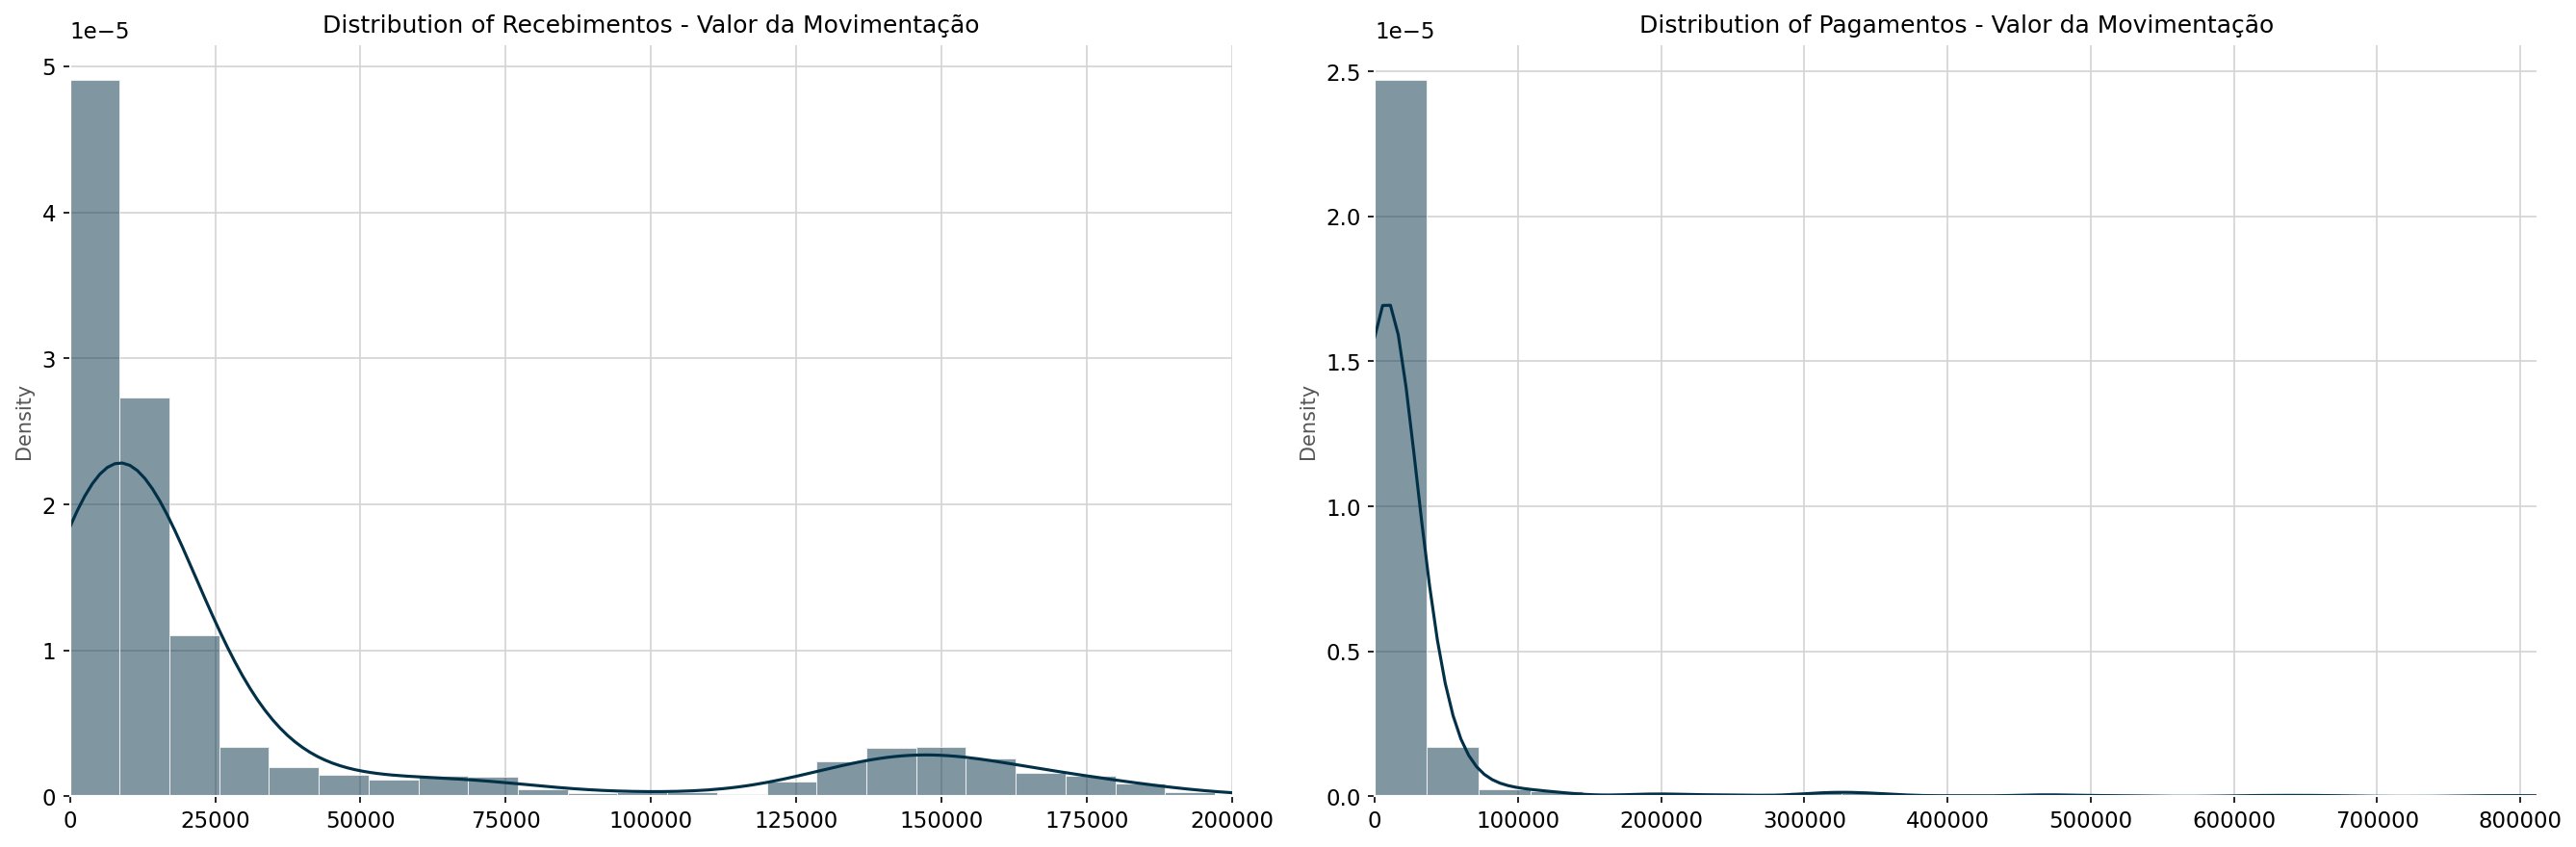

In [13]:
visualize_plots(
    dataset=dataset, 
    tables=['Recebimentos', 'Pagamentos'],  
    columns=['Valor da Movimentação'],
    plot_types=['histogram'],
    kde=True,
    figsize=(18, 6)
)

Insights:

- **The distribution of the receipts table** indicates a large volume of transactions within the range of **2/3 of 25,000** (standard *prices in BRL*). The same pattern is observed in the **payments table**, with **1/3 of 100,000**. This suggests the **range in which the main customers and suppliers are located**, highlighting the typical transaction values for these key stakeholders.

### **4.2 Categorical distribution**

Now, I will analyze the categorical columns of the dfs, to see which categories appear the most. (Note: The plot title follows the following structure: Column (df))

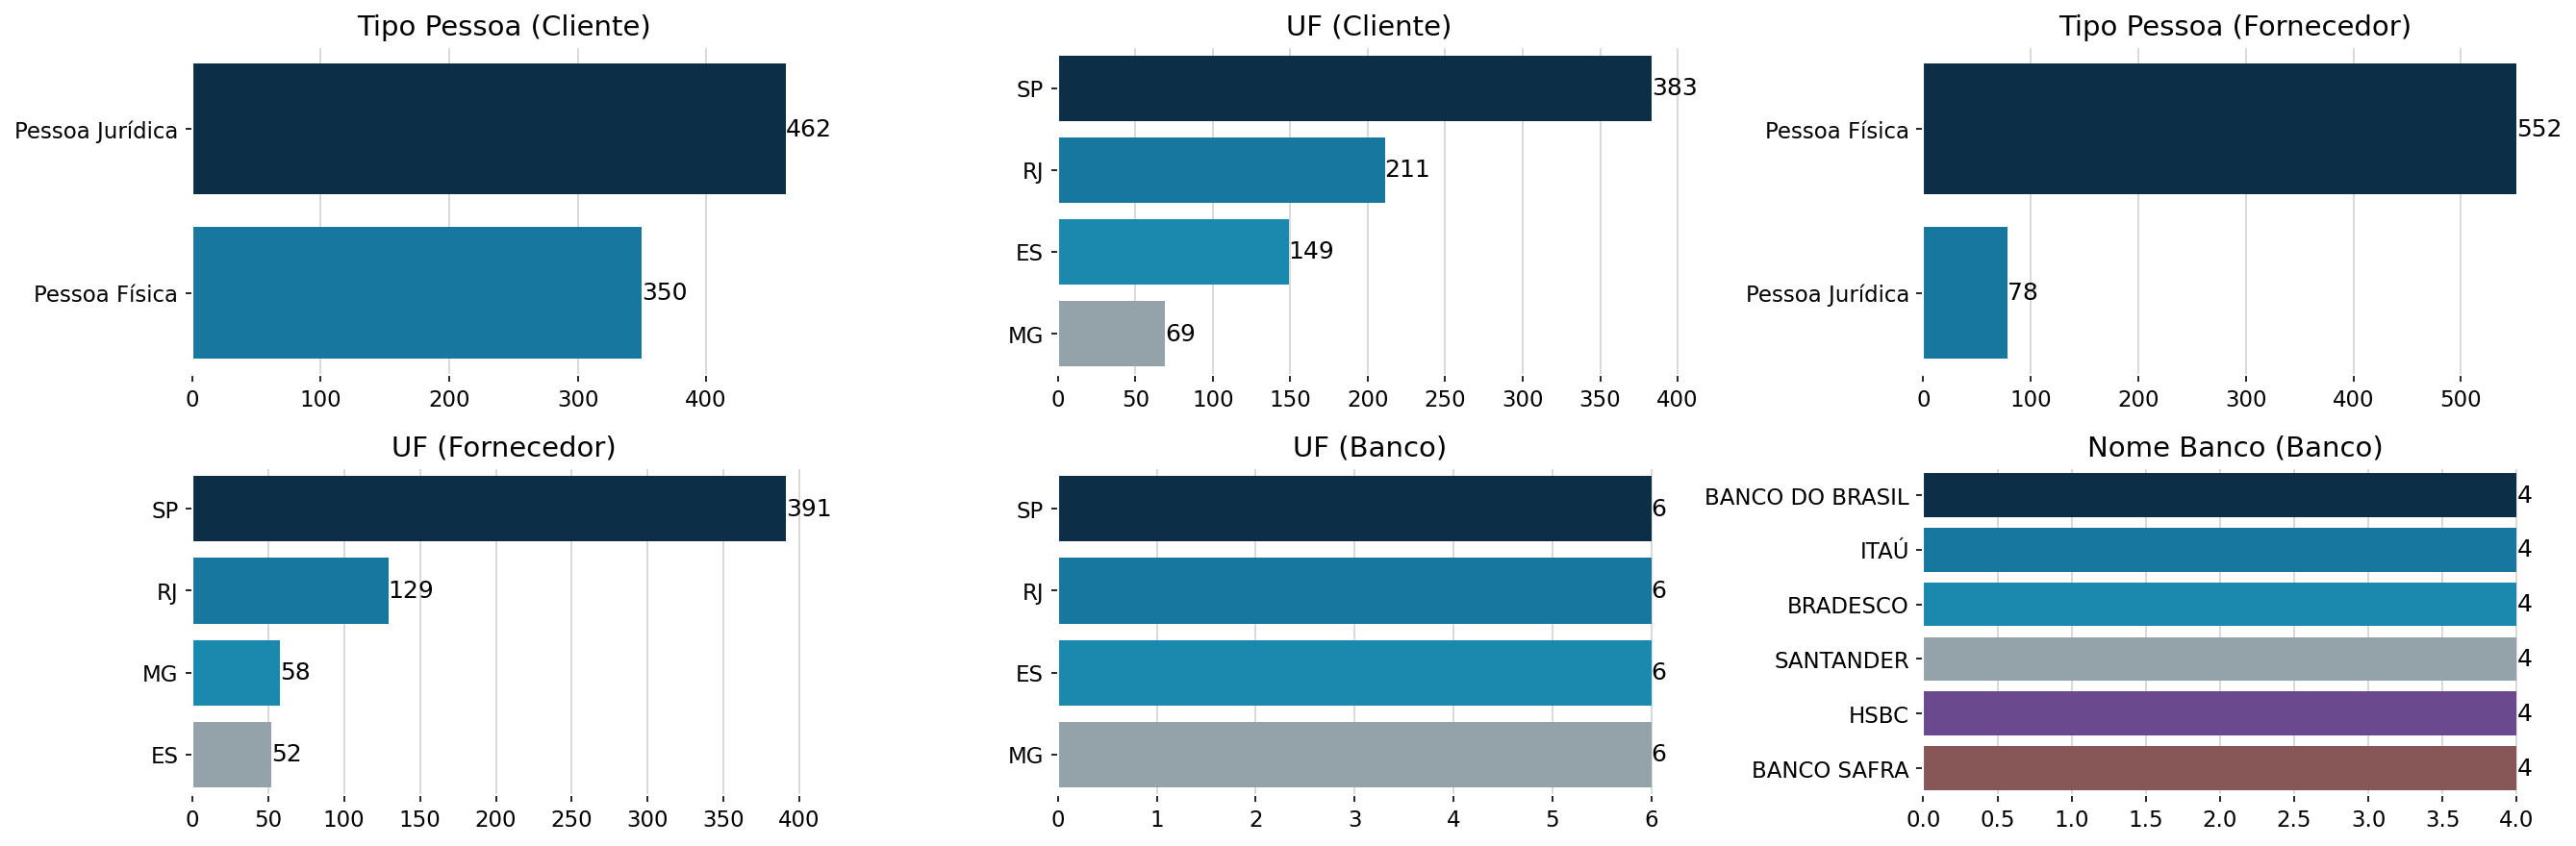

In [14]:
# Define the DataFrames (Make sure you have loaded them beforehand)
tables = {"Cliente": df_customer, "Fornecedor": df_supplier, "Banco": df_bank}

# Specify which categorical columns to plot
selected_columns = ["Tipo Pessoa", "UF", "Nome Banco"]

# Call the function to generate plots
plot_categorical_distribution(tables, selected_columns, figsize=(18, 6))

Insights:

- It is necessary to correlate these quantities with the amounts moved in the Customer and Supplier tables to infer the importance of each category.

- In quantitative terms, more business is conducted with Customers and Suppliers of the type: individual (natural persons). **The difference between the types of entities** in the Customer table is **112**. In the Supplier table, the difference is much more significant, being **474**.

- **The States where the most business is conducted** (with Customers or Suppliers) are **SP** and **RJ**, in that order. In the Customer table, the difference in the number of transactions (recorded) between these two States is **197**, while in the Supplier table, it is **262**.

- **The number of banks coincides with the number of States (UF)**. This does not mean they have the same level of importance. The weight of each bank should be evaluated in relation to the amount moved through them.

### **4.3 Outliers** 

I had already noticed signs of the presence of outliers. Now, I will explore them. I am interested in knowing, first, how many of them there are and what % they represent of the data. Also, if there is a concentration of most of them in a certain range.

In [15]:
detect_outliers(
    dataset=dataset,
    tables=['Recebimentos', 'Pagamentos'],
    columns=['Valor da Movimentação'],
    verbose=True
)

◇ Recebimentos
    - Valor da Movimentação: 320 outliers (18.59%)
◇ Pagamentos
    - Valor da Movimentação: 87 outliers (8.67%)


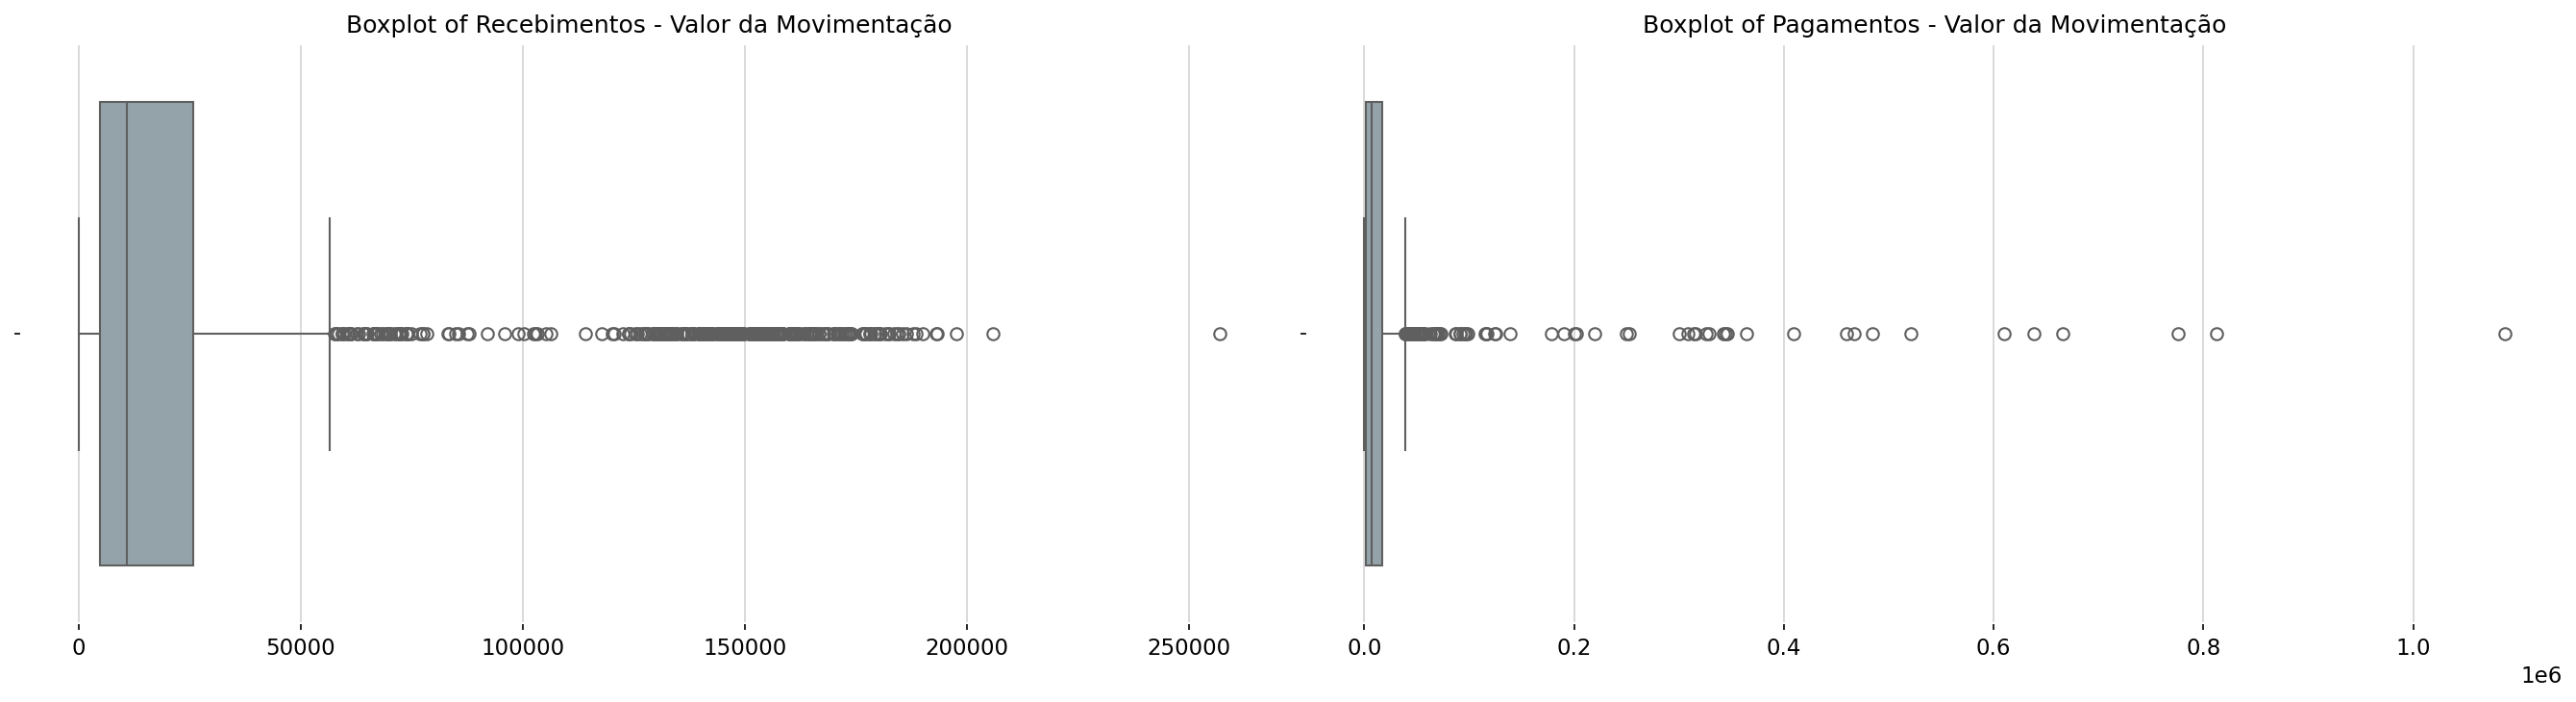

In [28]:
visualize_plots(
    dataset=dataset, 
    tables=['Recebimentos', 'Pagamentos'],  
    columns=['Valor da Movimentação'],  
    outliers=True,
    color='#90a4ae',
    figsize=(18, 5)
)

Insights:

- **Outliers in the Receipts table**, for the column in question, are more concentrated just above Q3 and in the range of **100.000,00** to **200,000.00** (BRL).  
- **Outliers in the Payments table** are more concentrated just above Q3.  
- Due to the nature of the data (customers and suppliers), I will **keep the outliers**. It is important, for business strategies, to identify which customers and suppliers represent the highest financial volume. This information can help prioritize key relationships and optimize financial planning.

#### ***A little deepening into outliers***

I will **create a column categorizing clients and suppliers** according to their transaction volume. I will do this using quartiles and IQR.

In [17]:
# Creating categories for customers based on transaction value
def categorize_clients(df, column='Valor da Movimentação'):
    q1 = df[column].quantile(0.25) 
    q3 = df[column].quantile(0.75)  
    iqr = q3 - q1  
    
    median = df[column].median()
    high_threshold = q3 + 1.5 * iqr

    def categorize(value):
        if 0 < value < median:
            return 'Normal'
        elif value > high_threshold:
            return 'Crítico'
        else:
            return 'Médio'

    df['Segmento Cliente'] = df[column].apply(categorize)
    return df

# Apply the categorization
df_receipts_categ = categorize_clients(dataset['data']['Recebimentos'])
df_payments_categ = categorize_clients(dataset['data']['Pagamentos'])

In [18]:
# Checking if categorization was successful
print("📄 Recebimentos")
display(df_receipts_categ.head(10))
print("\n" + "-"*100)
print("\n📄 Pagamentos")
display(df_payments_categ.head(10))

📄 Recebimentos


,Id Cliente,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação,Segmento Cliente
0,53,x 10859524552-06,2018-01-02,2018-01-02,2018-01-02,675.87,Normal
1,178,x 39315597929-00,2018-01-04,2018-01-04,2018-01-04,153538.56,Crítico
2,178,x 41541621975-04,2018-01-05,2018-01-05,2018-01-05,29823.06,Médio
3,178,x 63718177635-06,2018-01-06,2018-01-06,2018-01-06,52492.86,Médio
4,178,x 80771218846-00,2018-01-06,2018-01-06,2018-01-06,29336.04,Médio
5,178,x 94994947160-08,2018-01-09,2018-01-09,2018-01-09,72147.34,Crítico
6,783,x 14057272557-06,2018-01-09,2018-01-09,2018-01-09,5576.00,Normal
7,178,x 10859524552-06,2018-01-11,2018-01-11,2018-01-11,42301.72,Médio
8,178,x 22208151256-06,2018-01-12,2018-01-12,2018-01-12,1519.71,Normal
9,178,x 64252401479-03,2018-01-12,2018-01-12,2018-01-12,173417.00,Crítico



----------------------------------------------------------------------------------------------------

📄 Pagamentos


,Id Fornecedor,Id Conta Bancária,Data de Emissao,Data de Vencimento,Data da Movimentação,Valor da Movimentação,Segmento Cliente
0,9,x 80771218846-00,2018-01-11,2018-01-16,2018-01-11,19540.710,Médio
1,150,x 75664985359-06,2018-01-13,2018-01-16,2018-01-18,1577.625,Normal
2,150,x 61586581630-06,2018-01-13,2018-01-16,2018-01-19,1431.080,Normal
3,150,x 10641176832-10,2018-01-19,2018-01-23,2018-01-19,2060.765,Normal
4,197,x 77167377617-02,2018-01-30,2018-01-30,2018-01-30,13182.400,Médio
5,33,x 41541621975-04,2018-02-06,2018-02-06,2018-02-06,13088.810,Médio
6,89,x 77167377617-02,2018-02-06,2018-02-06,2018-02-06,23009.735,Médio
7,112,x 25497925389-08,2018-02-03,2018-02-06,2018-02-06,458.080,Normal
8,227,x 64252401479-03,2018-02-06,2018-02-06,2018-02-06,12986.645,Médio
9,405,x 10641176832-10,2018-02-06,2018-02-06,2018-02-06,11705.295,Médio


I will count the appearances of the categories in each df.

In [19]:
print('-' * 30)
print(f'\n◇ Tabela Recebimentos ◇\n{df_receipts_categ['Segmento Cliente'].value_counts()}\n')
print('-' * 30)
print(f'\n◇ Tabela Pagamentos ◇\n{df_payments_categ['Segmento Cliente'].value_counts()}')

------------------------------

◇ Tabela Recebimentos ◇
Segmento Cliente
Normal     849
Médio      552
Crítico    320
Name: count, dtype: int64

------------------------------

◇ Tabela Pagamentos ◇
Segmento Cliente
Normal     498
Médio      419
Crítico     87
Name: count, dtype: int64


Now, I will check the amount that the outliers and non-outliers moved, for comparative purposes. I will do this by also highlighting the percentiles that these values ​​occupy of the total moved.

In [20]:
# Calculating the total amount moved by each group in Receipts
total_non_outliers_receipts = df_receipts_categ[
    df_receipts_categ['Segmento Cliente'] != 'Crítico']['Valor da Movimentação'].sum()
total_outliers_receipts = df_receipts_categ[
    df_receipts_categ['Segmento Cliente'] == 'Crítico']['Valor da Movimentação'].sum()

# Calculating the total amount moved by each group in Payments
total_non_outliers_payments = df_payments_categ[
    df_payments_categ['Segmento Cliente'] != 'Crítico']['Valor da Movimentação'].sum()
total_outliers_payments = df_payments_categ[
    df_payments_categ['Segmento Cliente'] == 'Crítico']['Valor da Movimentação'].sum()

# Calculating grand totals
total_receipts = total_non_outliers_receipts + total_outliers_receipts
total_payments = total_non_outliers_payments + total_outliers_payments

# Calculating percentages
percent_non_outliers_receipts = (total_non_outliers_receipts / total_receipts) * 100
percent_outliers_receipts = (total_outliers_receipts / total_receipts) * 100

percent_non_outliers_payments = (total_non_outliers_payments / total_payments) * 100
percent_outliers_payments = (total_outliers_payments / total_payments) * 100

In [21]:
# Exibindo os resultados
print("Receipts df:")

print(
    f"Total moved by NON-outlier clients: R$" 
    f"{total_non_outliers_receipts:,.2f} ({percent_non_outliers_receipts:.2f}%)"
)

print(
    f"Total moved by OUTLIER clients: R$" 
    f"{total_outliers_receipts:,.2f} ({percent_outliers_receipts:,.2f}%)"
)

print(f"Total Receipts: R$ {total_receipts:,.2f}\n")

print("Payments df:")

print(
    f"Total moved by NON-outlier clients: R$"
    f"{total_non_outliers_payments:,.2f} ({percent_non_outliers_payments:,.2f}%)"
)

print(
    f"Total moved by OUTLIER clients: R$" 
    f"{total_outliers_payments:,.2f} ({percent_outliers_payments:,.2f}%)"
)

print(f"Total Payments: R$ {total_payments:,.2f}\n")

Receipts df:
Total moved by NON-outlier clients: R$15,821,097.47 (26.65%)
Total moved by OUTLIER clients: R$43,552,308.74 (73.35%)
Total Receipts: R$ 59,373,406.21

Payments df:
Total moved by NON-outlier clients: R$8,441,422.70 (35.15%)
Total moved by OUTLIER clients: R$15,574,884.81 (64.85%)
Total Payments: R$ 24,016,307.51



**Summary:**
- **Receipts:** Outlier clients represent **73.35%** of the total transaction volume, while non-outlier clients represent **26.65%**.  
- **Payments:** Outlier clients represent **64.85%** of the total transaction volume, while non-outlier clients represent **35.15%**. 

For finish, i will see some **specific statistics**. 

In [22]:
# Function to format numbers
def format_dataframe(df):
    # Identifica colunas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Aplica formatação apenas nas colunas numéricas
    styled_df = df.style.format(
        precision=2, 
        thousands=".", 
        decimal=",", 
        subset=numeric_cols  # Aplica formatação apenas nas colunas numéricas
    ).set_table_styles([
        {'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '13px'), ('text-align', 'right')]}
    ])
    
    return styled_df

In [23]:
receipts_summary = detect_outliers(
    dataset=dataset,
    tables=['Recebimentos'],
    columns=['Valor da Movimentação'],
    strategy='separate analysis'
)

# Exibindo tabelas formatadas
print("📌 Receipt Analysis")
display(format_dataframe(receipts_summary))

📌 Receipt Analysis


,Métrica,All Data,Sem Outliers,Apenas Outliers
0,Mean,"34.499,36","11.292,72","136.100,96"
1,Median,"10.962,27","8.364,00","144.787,52"
2,Standard Deviation,"51.813,35","9.976,34","36.301,75"
3,Minimum,"0,00","0,00","57.697,60"
4,Maximum,"256.906,12","56.502,70","256.906,12"
5,Count,"1.721,00","1.401,00","320,00"


Insights:

- **NON-Outliers**

    - Non-outlier customers perform a large number of transactions, but each transaction has a relatively moderate value.

    - The mean, median, and standard deviation of the non-outlier customer column indicate a stable pattern of movement, without significant variations within this group.

    - The highest individual receipt in this group (**R$56.502,70**) defines the ceiling for regular operations.

- **Outliers**

    - The low number of transactions (**320**), but with very high average values, indicates that **a few customers concentrate a large portion of the receipts**.

    - The median being higher than the mean suggests that there are some extreme values pulling the mean down, but overall, the values are high.

    - Since the lowest value of an outlier is **R$57.697,60** , any customer above this threshold has a significant impact on the financial flow.

In [24]:
# Estatistics for Payments
payments_summary = detect_outliers(
    dataset=dataset,
    tables=['Pagamentos'],
    columns=['Valor da Movimentação'],
    strategy='separate analysis'
)

print("📌 Payment Analysis")
display(format_dataframe(payments_summary))

📌 Payment Analysis


,Métrica,All Data,Sem Outliers,Apenas Outliers
0,Mean,"23.920,63","9.205,48","179.021,66"
1,Median,"7.068,60","6.247,50","72.160,62"
2,Standard Deviation,"77.687,58","9.318,02","206.928,53"
3,Minimum,"0,00","0,00","39.599,21"
4,Maximum,"1.087.492,49","38.837,71","1.087.492,49"
5,Count,"1.004,00","917,00","87,00"


Insights:

- **NON-Outliers**

    - Payments follow a pattern similar to receipts, with more frequent transactions but with moderate individual values.

    - The median being lower than the mean indicates that small payments are made regularly, but there are also some larger values that raise the average.

    - The highest individual payment (**R$ 38.837,73**) defines the upper limit for this group.

- **Outliers**

    - The low number of transactions (**87**), but with very high values, indicates that **a few payments concentrate the majority of expenses**.

    - The median being significantly lower than the mean suggests that **there are some extremely high payments pulling the average up**.

    - The highest individual payment (**R$ 1.087.429,49**) could represent major acquisitions, investments, debt settlements, or payments to strategic suppliers.

### **4.4 Saving the data**

Now, I will save the modifications.

In [25]:
# Define the new file path for the updated dataset
output_path = os.path.join(os.path.dirname(file_path), "Financeiro_Atualizado.xlsx")

# Save the updated dataset to the new file
save_data(dataset, output_path)

Excel file successfully saved.


## **5. EDA Conclusions**

- The EDA did not reveal major issues with the data and provided significant insights. However, some problems were identified in categorical data (such as state and bank names), which were also properly addressed.

- There are indications that most payments are made shortly after the due date. **Developing strategies to encourage customers to pay on time may reduce the risk of default**. On the other hand, the absence of null values in the due date suggests that there is no default from customers, or that customers who did not make payments are not part of the data domain.

- **The company sells more to legal entities but hires more individuals**. This suggests a business model where customers are corporate buyers, while suppliers are individual or freelance service providers. In the latter case, **seeking contracts with outsourcing companies may reduce costs**.

- In terms of transaction volume, SP and RJ are important states. In SP, the volume is significantly higher (391) compared to RJ's 129. **Market expansion to RJ or other cities in SP may be beneficial to increase the company's consolidation in the region**.

- Critical clients account for 73.4% of total receipts, showing that **the company's revenue heavily depends on a small group of high-value clients**. It is essential to monitor these clients, as their retention or departure can significantly impact the company's financial health. **Normal and medium clients, although they do not generate high volumes, provide a recurring revenue base, ensuring cash flow stability**.

- Critical suppliers represent 64.9% of total payments, indicating that **most of the company's spending is concentrated in a few strategic payments**. Monitoring these payments may be crucial for contract negotiations, cost reviews, and identifying opportunities to optimize expenses. The remaining suppliers (normal and medium) account for 35.1% of total payments, suggesting that **most disbursements come from smaller, more distributed transactions**. This group may be related to regular operational costs and common suppliers, ensuring the company's day-to-day operations.

1. Description
2. Technologies and tools
3. Business problem and project objective
4. Soluction pipeline
5. Main business insigths
6. Next steps
7. Run this project on your local machine
8. Dataset link